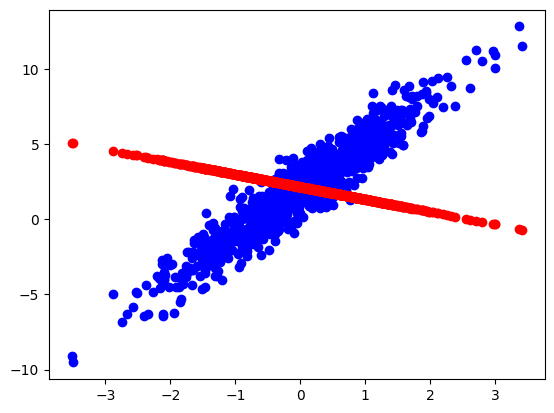

Current loss: 15.224378


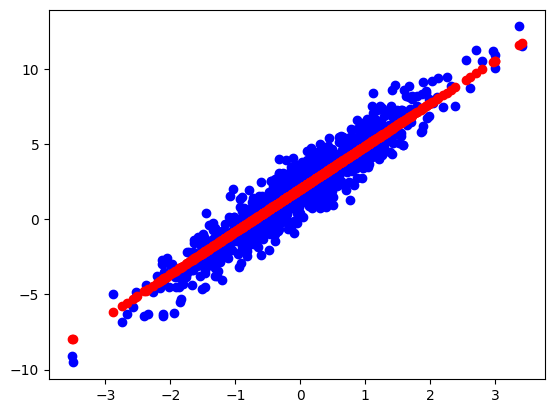

Current loss: 0.989040


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 실제 기울기와 y 절편
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

# 무작위 데이터 생성
X = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
y = X * TRUE_W + TRUE_b + noise

# 모델 클래스 정의
class Model(object):
    def __init__(self):
        # 초기값은 무작위로 설정
        self.W = tf.Variable(tf.random.normal([]))
        self.b = tf.Variable(tf.random.normal([]))

    def __call__(self, x):
        return self.W * x + self.b

# 손실 함수 정의 (평균 제곱 오차)
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# 학습 함수 정의
def train(model, X, y, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss_fn(y, model(X))
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

model = Model()

# 학습 전 모델의 성능 시각화
plt.scatter(X, y, c='b')
plt.scatter(X, model(X), c='r')
plt.show()

print('Current loss: %1.6f' % loss_fn(model(X), y).numpy())

# 학습 (여기서는 15번의 에포크를 사용)
for epoch in range(15):
    train(model, X, y, learning_rate=0.1)

# 학습 후 모델의 성능 시각화
plt.scatter(X, y, c='b')
plt.scatter(X, model(X), c='r')
plt.show()

print('Current loss: %1.6f' % loss_fn(model(X), y).numpy())